In \[1\]:

    import numpy as np
    import pandas as pd
    import keras
    import cv2
    from matplotlib import pyplot as plt
    import os
    import random
    from PIL import Image

In \[2\]:

    df=pd.read_csv("train.csv")
    base_path="./IMAGES/"

In \[4\]:

    df

Out\[4\]:

|         | id               | landmark_id |
|---------|------------------|-------------|
| 0       | 17660ef415d37059 | 1           |
| 1       | 92b6290d571448f6 | 1           |
| 2       | cd41bf948edc0340 | 1           |
| 3       | fb09f1e98c6d2f70 | 1           |
| 4       | 25c9dfc7ea69838d | 7           |
| ...     | ...              | ...         |
| 1580465 | 72c3b1c367e3d559 | 203092      |
| 1580466 | 7a6a2d9ea92684a6 | 203092      |
| 1580467 | 9401fad4c497e1f9 | 203092      |
| 1580468 | aacc960c9a228b5f | 203092      |
| 1580469 | d9e338c530dca106 | 203092      |

1580470 rows × 2 columns

In \[5\]:

    df = df.loc[df["id"].str.startswith(('00', 'b1', '7d'), na=False), :]
    num_classes = len(df["landmark_id"].unique())
    num_data = len(df)

In \[6\]:

    num_classes

Out\[6\]:

    13484

In \[7\]:

    num_data

Out\[7\]:

    18321

In \[8\]:

    data=pd.DataFrame(df["landmark_id"].value_counts())
    data.reset_index(inplace=True)
    data.head()

Out\[8\]:

|     | landmark_id | count |
|-----|-------------|-------|
| 0   | 138982      | 88    |
| 1   | 126637      | 29    |
| 2   | 83144       | 26    |
| 3   | 194914      | 17    |
| 4   | 149980      | 16    |

In \[9\]:

    data.tail()

Out\[9\]:

|       | landmark_id | count |
|-------|-------------|-------|
| 13479 | 76707       | 1     |
| 13480 | 76738       | 1     |
| 13481 | 76739       | 1     |
| 13482 | 76752       | 1     |
| 13483 | 203085      | 1     |

In \[10\]:

    data.columns=['landmark_id','count']

In \[11\]:

    data['count'].describe()

Out\[11\]:

    count    13484.000000
    mean         1.358721
    std          1.215364
    min          1.000000
    25%          1.000000
    50%          1.000000
    75%          1.000000
    max         88.000000
    Name: count, dtype: float64

In \[12\]:

    plt.hist(data['count'],100, range=(0,32), label='test')

Out\[12\]:

    (array([0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0589e+04, 0.0000e+00,
            0.0000e+00, 1.9450e+03, 0.0000e+00, 0.0000e+00, 5.5800e+02,
            0.0000e+00, 0.0000e+00, 2.1100e+02, 0.0000e+00, 0.0000e+00,
            8.1000e+01, 0.0000e+00, 0.0000e+00, 3.3000e+01, 0.0000e+00,
            0.0000e+00, 2.3000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
            9.0000e+00, 0.0000e+00, 0.0000e+00, 1.3000e+01, 0.0000e+00,
            0.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00, 7.0000e+00,
            0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
            3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
            0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
            1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
            0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
            0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
            0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
            0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
            0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
            0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
            0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
            1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
            0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
     array([ 0.  ,  0.32,  0.64,  0.96,  1.28,  1.6 ,  1.92,  2.24,  2.56,
             2.88,  3.2 ,  3.52,  3.84,  4.16,  4.48,  4.8 ,  5.12,  5.44,
             5.76,  6.08,  6.4 ,  6.72,  7.04,  7.36,  7.68,  8.  ,  8.32,
             8.64,  8.96,  9.28,  9.6 ,  9.92, 10.24, 10.56, 10.88, 11.2 ,
            11.52, 11.84, 12.16, 12.48, 12.8 , 13.12, 13.44, 13.76, 14.08,
            14.4 , 14.72, 15.04, 15.36, 15.68, 16.  , 16.32, 16.64, 16.96,
            17.28, 17.6 , 17.92, 18.24, 18.56, 18.88, 19.2 , 19.52, 19.84,
            20.16, 20.48, 20.8 , 21.12, 21.44, 21.76, 22.08, 22.4 , 22.72,
            23.04, 23.36, 23.68, 24.  , 24.32, 24.64, 24.96, 25.28, 25.6 ,
            25.92, 26.24, 26.56, 26.88, 27.2 , 27.52, 27.84, 28.16, 28.48,
            28.8 , 29.12, 29.44, 29.76, 30.08, 30.4 , 30.72, 31.04, 31.36,
            31.68, 32.  ]),
     <BarContainer object of 100 artists>)

No description has been provided for this
image

In \[13\]:

    data['count'].between(0,5).sum()

Out\[13\]:

    13384

In \[14\]:

    data['count'].between(5,10).sum()

Out\[14\]:

    163

In \[15\]:

    plt.hist(df["landmark_id"],bins=df["landmark_id"].unique())

Out\[15\]:

    (array([1., 6., 1., ..., 1., 1., 3.]),
     array([2.20000e+01, 2.70000e+01, 6.00000e+01, ..., 2.03045e+05,
            2.03071e+05, 2.03085e+05]),
     <BarContainer object of 13483 artists>)

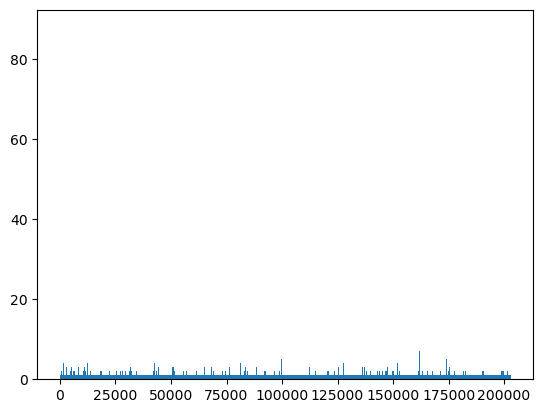

In \[16\]:

    from sklearn.preprocessing import LabelEncoder
    lencoder=LabelEncoder()
    lencoder.fit(df["landmark_id"])

Out\[16\]:

    LabelEncoder()

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

LabelEncoder

    LabelEncoder()

In \[17\]:

    df.head()

Out\[17\]:

|     | id               | landmark_id |
|-----|------------------|-------------|
| 85  | 7db26cd9d495e016 | 22          |
| 119 | 00cba0067c078490 | 27          |
| 120 | 00f928e383e1d121 | 27          |
| 358 | 7d0434b799fae3dd | 27          |
| 455 | b100c21f495b8c13 | 27          |

In \[18\]:

    def encode_label(lbl):
        return lencoder.transform(lbl)

In \[19\]:

    def decode_label(lbl):
        return lencoder.inverse_transform(lbl)

In \[20\]:

    def get_image_from_number(num,df):
        fname, label=df.iloc[num, :]
        fname=fname + '.jpg'
        f1=fname[0]
        f2=fname[1]
        f3=fname[2]
        path=os.path.join(f1,f2,f3,fname)
        im=cv2.imread(os.path.join(base_path,path))
        return im,label

In \[21\]:

    print(base_path)

    ./IMAGES/

In \[24\]:

    import os
    import random
    import numpy as np
    from PIL import Image
    from matplotlib import pyplot as plt

    def display_random_images(base_path, num_images=4):
        print(f"Displaying {num_images} sample images from: {base_path}")
        fig = plt.figure(figsize=(16, 16))
        subfolders = [f for f in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, f))]
        if not subfolders:
            print(f"No subfolders found in {base_path}.")
            return
        for i in range(num_images):
            random_subfolder = random.choice(subfolders)
            subfolder_path = os.path.join(base_path, random_subfolder)
            if '0' in os.listdir(subfolder_path):
                subfolder_path = os.path.join(subfolder_path, '0')
            image_files = [f for f in os.listdir(subfolder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
            if len(image_files) == 0:
                print(f"No images found in {subfolder_path}.")
                continue
            random_img = random.choice(image_files)
            img_path = os.path.join(subfolder_path, random_img)

            try:
                img = np.array(Image.open(img_path))
                fig.add_subplot(1, num_images, i + 1)
                plt.imshow(img)
                plt.axis('off')
            except FileNotFoundError:
                print(f"File not found: {img_path}")
                continue

        plt.show()
    base_path_0 = r'C:\Users\P.Sanjana\Desktop\images\0\0'
    display_random_images(base_path_0)
    base_path_images_000 = r'C:\Users\P.Sanjana\Desktop\images\images_000\0\0'
    display_random_images(base_path_images_000)

    Displaying 4 sample images from: C:\Users\P.Sanjana\Desktop\images\0\0

No description has been provided for this
image

    Displaying 4 sample images from: C:\Users\P.Sanjana\Desktop\images\images_000\0\0

No description has been provided for this
image

In \[25\]:

    import numpy as np
    import pandas as pd
    import tensorflow as tf
    from keras.applications.vgg19 import VGG19
    from keras.layers import *
    from keras import Sequential

In \[26\]:

    learning_rate=0.0001
    decay_speed=1e-6
    momentum=0.09
    loss_function="sparse_categorical_crossentropy"
    source_model=VGG19(weights=None)
    drop_layer=Dropout(0.5)
    drop_layer2=Dropout(0.5)

In \[27\]:

    model= Sequential()
    for layer in source_model.layers[:-1]:
        if layer==source_model.layers[-25]:
            model.add(BatchNormalization())
        model.add(layer)
    model.add(Dense(num_classes,activation="softmax"))
    model.summary()

```
Model: "sequential"
```

```
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization                  │ (None, 224, 224, 3)         │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc2 (Dense)                          │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 13484)               │      55,243,948 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘
```

```
 Total params: 194,814,200 (743.16 MB)
```

```
 Trainable params: 194,814,194 (743.16 MB)
```

```
 Non-trainable params: 6 (24.00 B)
```

In \[28\]:

    learning_rate = 0.001  
    optim1 = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    model.compile(optimizer=optim1,
                  loss='sparse_categorical_crossentropy',  
                  metrics=["accuracy"])

In \[46\]:

    def get_image_from_number(n, dataframe, base_path):
        image_id = dataframe.iloc[n]['id']
        image_path_0 = os.path.join(base_path, '0', '0', '1', '0', image_id + '.jpg')  
        image_path_images_000 = os.path.join(base_path, 'images_000', '0', '0', image_id + '.jpg')  

        if os.path.exists(image_path_0):
            img = cv2.imread(image_path_0)
            label = dataframe.iloc[n]['landmark_id']
            return img, label
        
        elif os.path.exists(image_path_images_000):
            img = cv2.imread(image_path_images_000)
            label = dataframe.iloc[n]['landmark_id']
            return img, label
        
        else:
            print(f"Image not found at any format for ID: {image_id}")
            return None, None

    def image_reshape(im, target_size):
        return cv2.resize(im, target_size)

    def get_batch(dataframe, start, batch_size, base_path):
        image_array = []
        label_array = []
        end_img = start + batch_size
        if end_img > len(dataframe):
            end_img = len(dataframe)
            
        for idx in range(start, end_img):
            n = idx
            im, label = get_image_from_number(n, dataframe, base_path)
            
            if im is not None and not im.size == 0: 
                im = image_reshape(im, (224, 224)) / 255.0
                image_array.append(im)
                label_array.append(label)
            else:
                print(f"Image at index {n} is empty or not found, skipping.")

        label_array = encode_label(label_array)
        print(f"Attempting to load image with ID: {image_id} at path: {image_path}")

        return np.array(image_array), np.array(label_array)

In \[47\]:

    train, val = np.split(df.sample(frac=1), [int(0.8 * len(df))])  

In \[57\]:

    base_paths = [
        r'C:\Users\P.Sanjana\Desktop\images\0\0', 
        r'C:\Users\P.Sanjana\Desktop\images\images_000\0\0'
    ]
    image_paths = []
    labels = []

    for base_path in base_paths:
        for label in os.listdir(base_path):
            label_path = os.path.join(base_path, label)
            if os.path.isdir(label_path):
                for img_file in os.listdir(label_path):
                    if img_file.endswith(('.jpg', '.jpeg', '.png')):
                        image_paths.append(os.path.join(label_path, img_file))
                        labels.append(label)
    train = pd.DataFrame({'image_path': image_paths, 'label': labels})
    print(train.head())
    print(train.columns)
    train['label_encoded'] = train['label'].map(label_mapping)

                                              image_path label
    0  C:\Users\P.Sanjana\Desktop\images\0\0\8\00834b...     8
    1  C:\Users\P.Sanjana\Desktop\images\0\0\8\00834d...     8
    2  C:\Users\P.Sanjana\Desktop\images\0\0\8\008352...     8
    3  C:\Users\P.Sanjana\Desktop\images\0\0\8\008358...     8
    4  C:\Users\P.Sanjana\Desktop\images\0\0\8\008359...     8
    Index(['image_path', 'label'], dtype='object')

In \[38\]:

    def image_reshape(im,target_size):
        return cv2.resize(im,target_size)

In \[39\]:

    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    batch_size=16
    epoch_shuffle=True
    weight_classes=True
    epochs=1
    train,val=np.split(df.sample(frac=1),[int(0.8*len(df))])
    print(len(train))
    print(len(val))

    14656
    3665

In \[40\]:

    good_preds = [] 
    good_preds = np.array(good_preds)  
    good_preds = np.array(sorted(good_preds, key=lambda x: x[2], reverse=True))

In \[50\]:

    import os
    import pandas as pd
    base_paths = [
        r'C:\Users\P.Sanjana\Desktop\images\0\0',   
        r'C:\Users\P.Sanjana\Desktop\images\images_000\0\0'
    ]
    image_data = []
    for base_path in base_paths:
        for class_folder in os.listdir(base_path):
            class_path = os.path.join(base_path, class_folder)
            if os.path.isdir(class_path):
                for image_file in os.listdir(class_path):
                    image_path = os.path.join(class_path, image_file)
                    if image_file.lower().endswith(('.jpg', '.jpeg', '.png'))
                        image_data.append([image_path, class_folder])
    df = pd.DataFrame(image_data, columns=['image_path', 'label'])
    print(df.head())
    df.to_csv('image_labels_combined.csv', index=False)

                                              image_path label
    0  C:\Users\P.Sanjana\Desktop\images\0\0\8\00834b...     8
    1  C:\Users\P.Sanjana\Desktop\images\0\0\8\00834d...     8
    2  C:\Users\P.Sanjana\Desktop\images\0\0\8\008352...     8
    3  C:\Users\P.Sanjana\Desktop\images\0\0\8\008358...     8
    4  C:\Users\P.Sanjana\Desktop\images\0\0\8\008359...     8

In \[51\]:

    label_mapping = {label: idx for idx, label in enumerate(df['label'].unique())}
    df['label_encoded'] = df['label'].map(label_mapping)

    print(df.head())

                                              image_path label  label_encoded
    0  C:\Users\P.Sanjana\Desktop\images\0\0\8\00834b...     8              0
    1  C:\Users\P.Sanjana\Desktop\images\0\0\8\00834d...     8              0
    2  C:\Users\P.Sanjana\Desktop\images\0\0\8\008352...     8              0
    3  C:\Users\P.Sanjana\Desktop\images\0\0\8\008358...     8              0
    4  C:\Users\P.Sanjana\Desktop\images\0\0\8\008359...     8              0

In \[52\]:

    import cv2
    import pandas as pd
    import matplotlib.pyplot as plt

In \[55\]:

    def decode_label(encoded_label):
        return list(label_mapping.keys())[list(label_mapping.values()).index(encoded_label)]
    num_images_to_display = 5
    fig = plt.figure(figsize=(20, 10))
    for i in range(num_images_to_display)
        image_info = df.iloc[i]
        image_path = image_info['image_path']
        label = image_info['label']
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        encoded_label = label_mapping[label]
        sample_count = len(df[df['label'] == label])
        ax = fig.add_subplot(1, num_images_to_display, i + 1)
        plt.imshow(img)
        plt.title(f"Label: {label}\nClassified as: {decode_label(encoded_label)}\nSamples in class: {sample_count}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

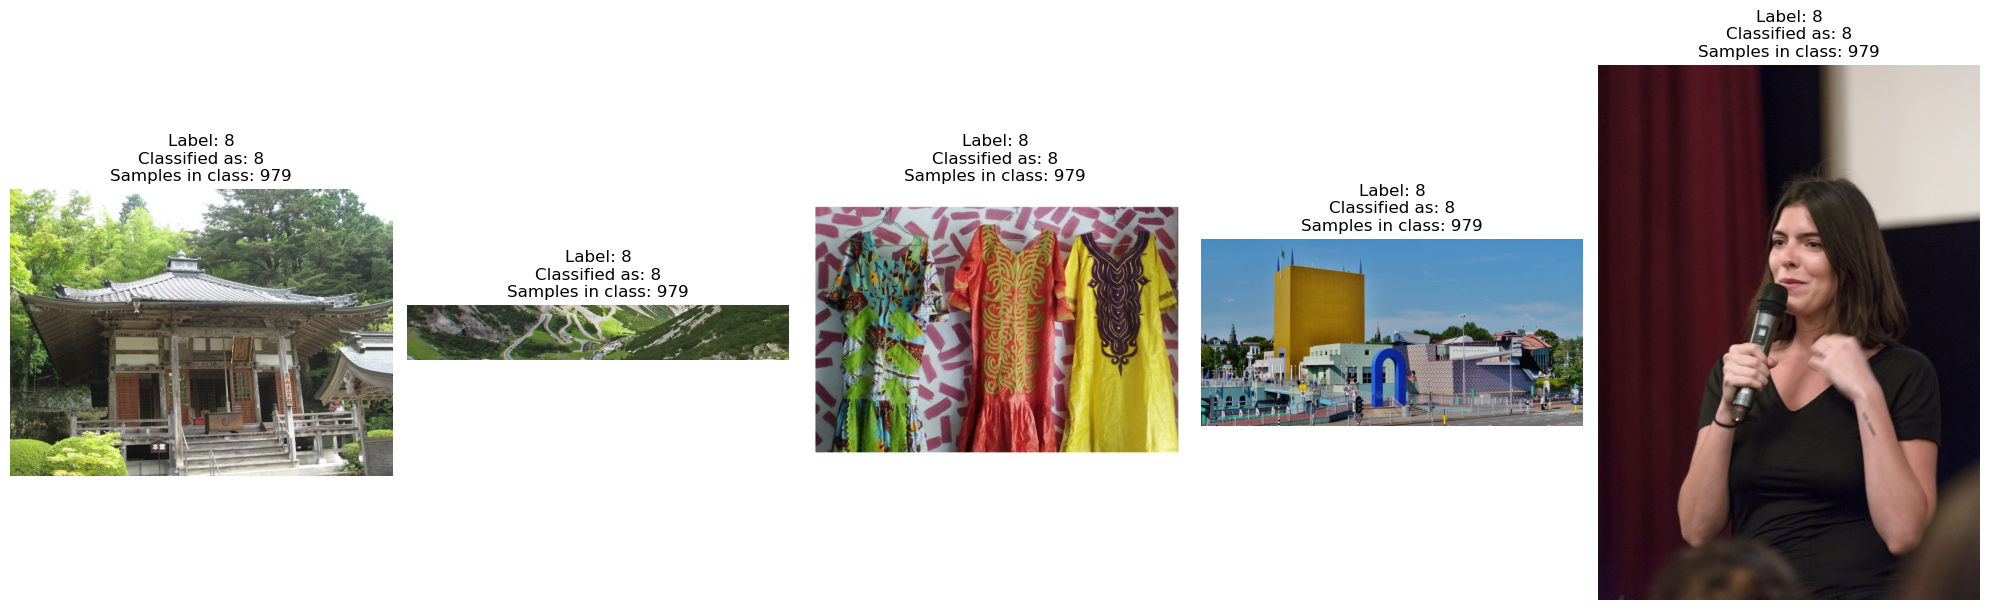

In \[ \]: